In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy
from statsmodels.stats.outliers_influence import variance_inflation_factor
pd.set_option('display.max_column',None)
from sklearn.linear_model import LinearRegression
from warnings import filterwarnings

In [113]:
df = pd.read_csv("fish.csv")

In [114]:
df.info

<bound method DataFrame.info of     Species  Weight  Length1  Length2  Length3   Height   Width
0     Bream   242.0     23.2     25.4     30.0  11.5200  4.0200
1     Bream   290.0     24.0     26.3     31.2  12.4800  4.3056
2     Bream   340.0     23.9     26.5     31.1  12.3778  4.6961
3     Bream   363.0     26.3     29.0     33.5  12.7300  4.4555
4     Bream   430.0     26.5     29.0     34.0  12.4440  5.1340
..      ...     ...      ...      ...      ...      ...     ...
154   Smelt    12.2     11.5     12.2     13.4   2.0904  1.3936
155   Smelt    13.4     11.7     12.4     13.5   2.4300  1.2690
156   Smelt    12.2     12.1     13.0     13.8   2.2770  1.2558
157   Smelt    19.7     13.2     14.3     15.2   2.8728  2.0672
158   Smelt    19.9     13.8     15.0     16.2   2.9322  1.8792

[159 rows x 7 columns]>

In [115]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [116]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [117]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


In [118]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [119]:
df['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

(array([35., 20.,  0.,  6.,  0., 11., 56.,  0., 17., 14.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

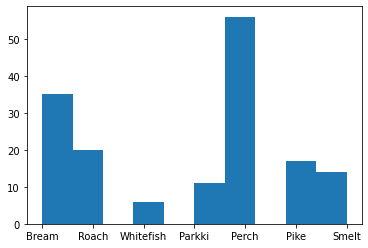

In [120]:
plt.hist(df.Species)

In [121]:
mod = ols ('Weight~Species',data=df).fit()
aov_table = sm.stats.anova_lm(mod,type=2)
print(aov_table)

             df        sum_sq       mean_sq          F        PR(>F)
Species     6.0  7.515048e+06  1.252508e+06  14.952487  2.112653e-13
Residual  152.0  1.273241e+07  8.376586e+04        NaN           NaN


<AxesSubplot:xlabel='Species', ylabel='Weight'>

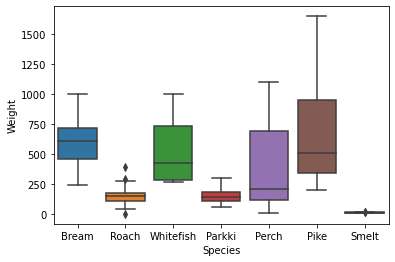

In [122]:
sns.boxplot(x='Species',y='Weight',data = df)

In [123]:
tukey = pairwise_tukeyhsd(df.Weight,df.Species, alpha=0.05)
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1   group2   meandiff p-adj    lower      upper   reject
-------------------------------------------------------------
 Bream    Parkki -463.0104  0.001   -761.953 -164.0678   True
 Bream     Perch -235.5893 0.0042  -421.9404  -49.2382   True
 Bream      Pike  100.8773    0.9  -154.7943  356.5489  False
 Bream     Roach -465.7786  0.001  -708.2003 -223.3568   True
 Bream     Smelt   -606.65  0.001  -880.1386 -333.1614   True
 Bream Whitefish  -86.8286    0.9  -468.9677  295.3106  False
Parkki     Perch  227.4211 0.2132    -57.803  512.6453  False
Parkki      Pike  563.8877  0.001   229.2326  898.5428   True
Parkki     Roach   -2.7682    0.9  -327.4132  321.8768  False
Parkki     Smelt -143.6396 0.8731  -492.0964  204.8171  False
Parkki Whitefish  376.1818 0.1455   -62.7446  815.1083  False
 Perch      Pike  336.4666  0.001    96.9795  575.9537   True
 Perch     Roach -230.1893 0.0418  -455.4768   -4.9018   True
 Perch  

In [124]:
df['Species'].replace('Pike','Bream',inplace=True)
df['Species'].replace('Whitefish','Bream',inplace=True)
df['Species'].replace('Roach','Parkki',inplace=True)
df['Species'].replace('Smelt','Parkki',inplace=True)

In [125]:
mod = ols ('Weight~Species',data=df).fit()
aov_table =sm.stats.anova_lm(mod,type=2)
print(aov_table)

             df        sum_sq       mean_sq          F        PR(>F)
Species     2.0  7.127270e+06  3.563635e+06  42.371877  2.006441e-15
Residual  156.0  1.312019e+07  8.410378e+04        NaN           NaN


In [126]:
tukey = pairwise_tukeyhsd(df.Weight,df.Species, alpha=0.05)
print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
 Bream Parkki -529.5138 0.001  -665.849 -393.1786   True
 Bream  Perch -256.1745 0.001 -384.7488 -127.6002   True
Parkki  Perch  273.3393 0.001  135.9446   410.734   True
--------------------------------------------------------


In [127]:
df.Species.value_counts()

Bream     58
Perch     56
Parkki    45
Name: Species, dtype: int64

<AxesSubplot:xlabel='Species', ylabel='Weight'>

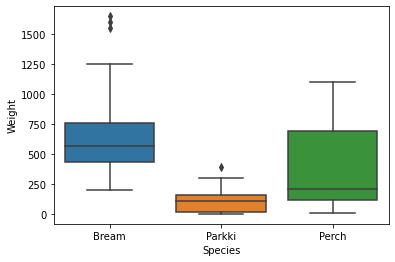

In [128]:
sns.boxplot(x='Species',y='Weight',data = df)

In [129]:
df.Length1.value_counts()

19.0    6
20.0    5
22.0    4
20.5    4
25.4    3
       ..
33.7    1
25.6    1
24.1    1
22.1    1
13.2    1
Name: Length1, Length: 116, dtype: int64

In [130]:
df.Length1.describe()

count    159.000000
mean      26.247170
std        9.996441
min        7.500000
25%       19.050000
50%       25.200000
75%       32.700000
max       59.000000
Name: Length1, dtype: float64

C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length1', ylabel='Density'>

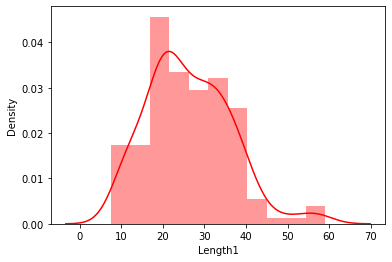

In [131]:
sns.distplot(df.Length1,color='red')

(array([14., 15., 37., 27., 28., 22., 10.,  2.,  1.,  3.]),
 array([ 7.5 , 12.65, 17.8 , 22.95, 28.1 , 33.25, 38.4 , 43.55, 48.7 ,
        53.85, 59.  ]),
 <BarContainer object of 10 artists>)

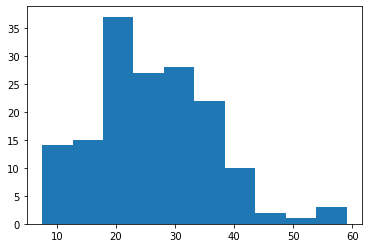

In [132]:
plt.hist(df.Length1)

C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length1'>

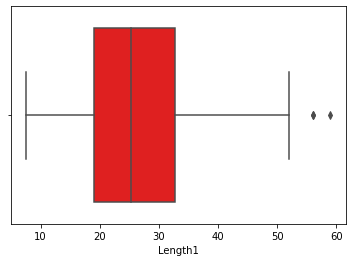

In [133]:
sns.boxplot(df.Length1,color='red')

C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length1', ylabel='Weight'>

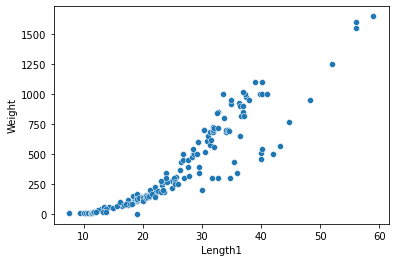

In [134]:
sns.scatterplot(df.Length1,df.Weight)

In [135]:
IQR=df.Length1.quantile(0.75)-df.Length1.quantile(0.25)
IQR

13.650000000000002

In [136]:
upper_limit=df.Length1.quantile(0.75)+(1.5*IQR)
upper_limit

53.175000000000004

In [137]:
len(df.Length1[df.Length1>51.8125])

4

In [138]:
df=df[df['Length1']<=51.8125]

C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length1'>

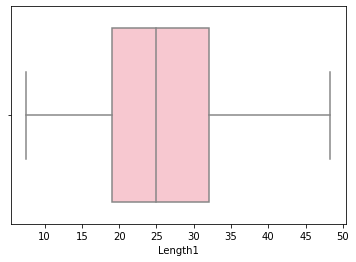

In [139]:
sns.boxplot(df.Length1,color='pink')

In [140]:
np.corrcoef(df.Length1, df.Weight)

array([[1.        , 0.89017262],
       [0.89017262, 1.        ]])

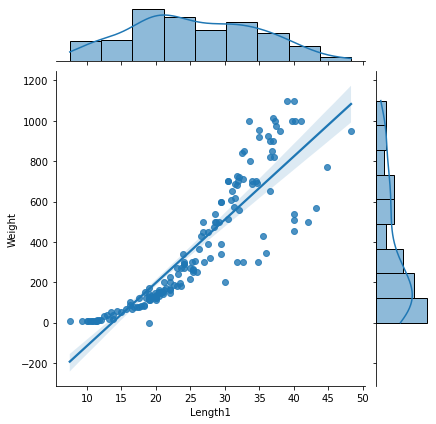

In [141]:
sns.jointplot(x='Length1',y='Weight',data=df,kind='reg')

# length2

In [142]:
df.Length2.describe().reset_index()

,index,Length2
0,count,155.000000
1,mean,27.604516
2,std,9.555969
3,min,8.400000
4,25%,21.000000
5,50%,26.500000
6,75%,35.000000
7,max,51.700000


In [143]:
df.Length2.value_counts()

22.0    7
35.0    6
22.5    5
40.0    5
21.0    4
       ..
18.7    1
19.6    1
21.3    1
22.7    1
14.3    1
Name: Length2, Length: 90, dtype: int64

(array([12.,  9., 22., 28., 22., 18., 21., 17.,  4.,  2.]),
 array([ 8.4 , 12.73, 17.06, 21.39, 25.72, 30.05, 34.38, 38.71, 43.04,
        47.37, 51.7 ]),
 <BarContainer object of 10 artists>)

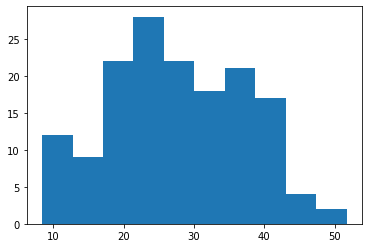

In [144]:
plt.hist(df.Length2)

C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length2', ylabel='Density'>

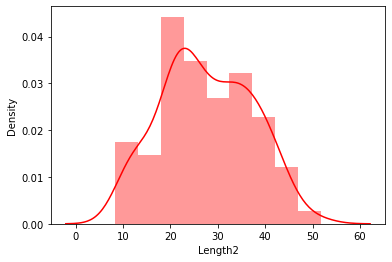

In [145]:
sns.distplot(df.Length2,color='red')

C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length2'>

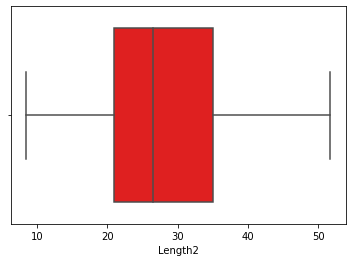

In [146]:
sns.boxplot(df.Length2,color='red')

C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length2', ylabel='Weight'>

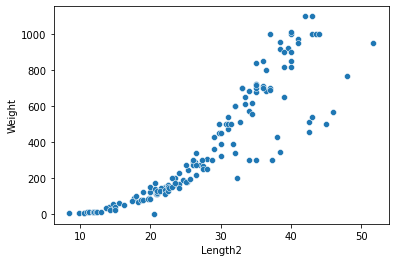

In [147]:
sns.scatterplot(df.Length2,df.Weight)

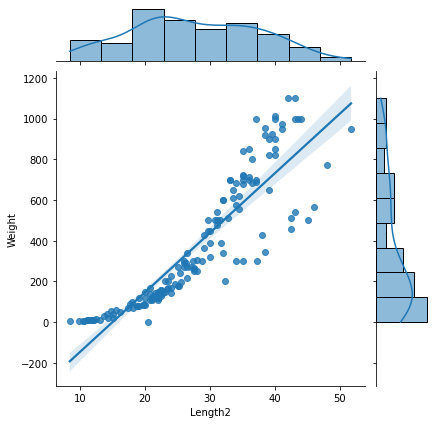

In [148]:
sns.jointplot(x='Length2',y='Weight',data=df,kind='reg')

In [149]:
IQR=df.Length2.quantile(0.75)-df.Length2.quantile(0.25)
IQR

14.0

In [150]:
upper_limit=df.Length2.quantile(0.75)+(1.5*IQR)
upper_limit

56.0

In [151]:
np.corrcoef(df.Length2, df.Weight)

array([[1.        , 0.89441472],
       [0.89441472, 1.        ]])

In [152]:
len(df.Length2[df.Length2>56])

0

# length3

In [153]:
df.Length3.describe()

count    155.000000
mean      30.383226
std       10.468442
min        8.800000
25%       22.950000
50%       29.200000
75%       39.350000
max       55.100000
Name: Length3, dtype: float64

In [154]:
df.Length3.value_counts()

23.5    5
34.0    3
22.5    3
45.5    3
36.2    3
       ..
26.8    1
26.7    1
27.2    1
25.3    1
15.2    1
Name: Length3, Length: 121, dtype: int64

(array([11., 10., 16., 31., 19., 15., 25., 20.,  6.,  2.]),
 array([ 8.8 , 13.43, 18.06, 22.69, 27.32, 31.95, 36.58, 41.21, 45.84,
        50.47, 55.1 ]),
 <BarContainer object of 10 artists>)

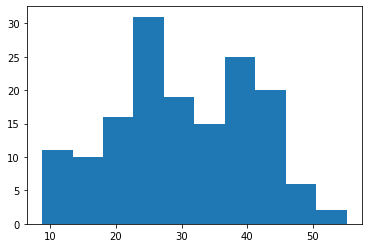

In [155]:
plt.hist(df.Length3)

C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Length3', ylabel='Density'>

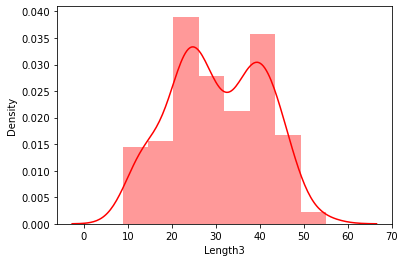

In [156]:
sns.distplot(df.Length3,color='red')

C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length3'>

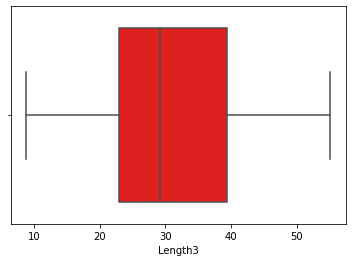

In [157]:
sns.boxplot(df.Length3,color='red')

C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length3', ylabel='Weight'>

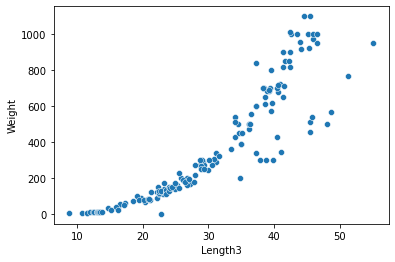

In [158]:
sns.scatterplot(df.Length3,df.Weight)

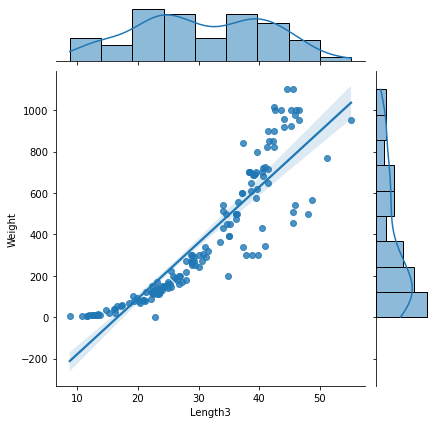

In [159]:
sns.jointplot(x='Length3',y='Weight',data=df,kind='reg')

In [160]:
IQR=df.Length3.quantile(0.75)-df.Length3.quantile(0.25)
IQR

16.39999999999999

In [161]:
upper_limit=df.Length3.quantile(0.75)+(1.5*IQR)
upper_limit

63.94999999999998

In [162]:
len(df.Length3[df.Length3>63.949])

0

In [163]:
np.corrcoef(df.Length3, df.Weight)

array([[1.        , 0.90257627],
       [0.90257627, 1.        ]])

In [164]:
df.Height.describe()

count    155.000000
mean       8.939934
std        4.336074
min        1.728400
25%        5.926950
50%        7.615600
75%       12.379300
max       18.957000
Name: Height, dtype: float64

In [165]:
df.Height.value_counts()

11.1366    2
5.6925     2
2.2139     2
6.1100     2
11.4884    1
          ..
7.0866     1
8.8768     1
8.5680     1
9.4850     1
2.9322     1
Name: Height, Length: 151, dtype: int64

(array([15.,  7., 40., 26.,  9., 17., 14., 13.,  8.,  6.]),
 array([ 1.7284 ,  3.45126,  5.17412,  6.89698,  8.61984, 10.3427 ,
        12.06556, 13.78842, 15.51128, 17.23414, 18.957  ]),
 <BarContainer object of 10 artists>)

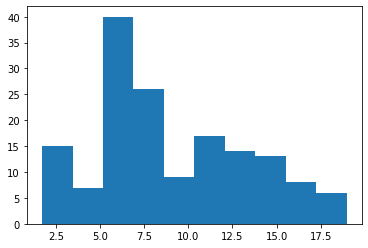

In [166]:
plt.hist(df.Height)

C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

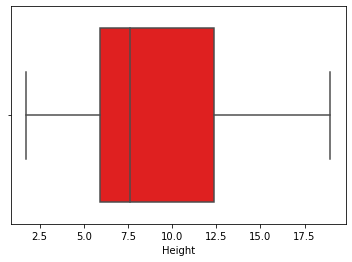

In [167]:
sns.boxplot(df.Height,color='red')

In [168]:
IQR=df.Height.quantile(0.75)-df.Height.quantile(0.25)
IQR

6.452350000000001

In [169]:
upper_limit=df.Height.quantile(0.75)+(1.5*IQR)
upper_limit

22.057825

In [170]:
len(df.Height[df.Height>22.05])

0

In [171]:
np.corrcoef(df.Height, df.Weight)

array([[1.        , 0.81523734],
       [0.81523734, 1.        ]])

In [172]:
corr = df.corr()
corr

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.890173,0.894415,0.902576,0.815237,0.925664
Length1,0.890173,1.000000,0.999385,0.990205,0.688050,0.891260
Length2,0.894415,0.999385,1.000000,0.992765,0.704041,0.897855
Length3,0.902576,0.990205,0.992765,1.000000,0.768038,0.898315
Height,0.815237,0.688050,0.704041,0.768038,1.000000,0.803268
Width,0.925664,0.891260,0.897855,0.898315,0.803268,1.000000


<AxesSubplot:>

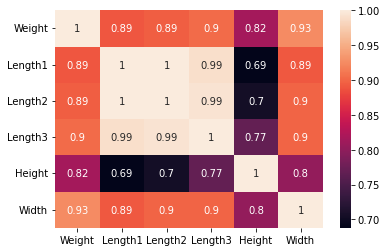

In [173]:
sns.heatmap(corr,annot=True)

In [174]:
df.Width.describe()

count    155.000000
mean       4.358886
std        1.664295
min        1.047600
25%        3.363600
50%        4.239000
75%        5.373200
max        8.142000
Name: Width, dtype: float64

In [175]:
df.Width.value_counts()

3.5250    3
1.1484    2
4.1440    2
3.6240    2
4.3350    2
         ..
3.6312    1
4.1272    1
3.9060    1
4.4968    1
1.8792    1
Name: Width, Length: 149, dtype: int64

C:\Users\Omkar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Width'>

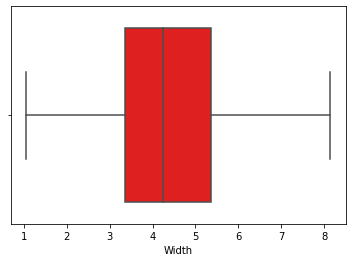

In [176]:
sns.boxplot(df.Width,color='red')

(array([13.,  7., 12., 33., 26., 23.,  9., 17., 10.,  5.]),
 array([1.0476 , 1.75704, 2.46648, 3.17592, 3.88536, 4.5948 , 5.30424,
        6.01368, 6.72312, 7.43256, 8.142  ]),
 <BarContainer object of 10 artists>)

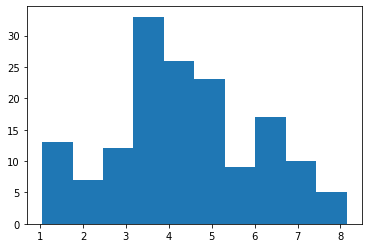

In [177]:
plt.hist(df.Width)

<AxesSubplot:xlabel='Width', ylabel='Weight'>

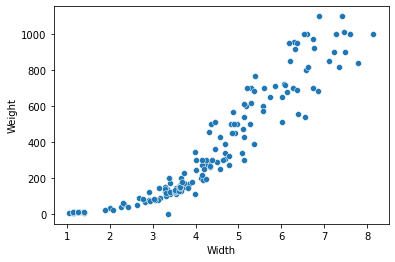

In [178]:
sns.scatterplot(x='Width',y='Weight',data=df)

In [179]:
IQR=df.Width.quantile(0.75)-df.Width.quantile(0.25)
IQR

2.0096000000000007

In [180]:
upper_limit=df.Width.quantile(0.75)+(1.5*IQR)
upper_limit

8.387600000000003

In [181]:
len(df.Width[df.Width>8.38])

0

In [182]:
np.corrcoef(df.Width, df.Weight)

array([[1.        , 0.92566439],
       [0.92566439, 1.        ]])

In [183]:
corr = df.corr()
corr

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.890173,0.894415,0.902576,0.815237,0.925664
Length1,0.890173,1.000000,0.999385,0.990205,0.688050,0.891260
Length2,0.894415,0.999385,1.000000,0.992765,0.704041,0.897855
Length3,0.902576,0.990205,0.992765,1.000000,0.768038,0.898315
Height,0.815237,0.688050,0.704041,0.768038,1.000000,0.803268
Width,0.925664,0.891260,0.897855,0.898315,0.803268,1.000000


<AxesSubplot:>

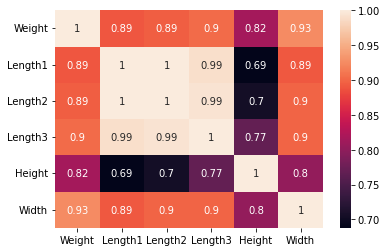

In [184]:
sns.heatmap(corr,annot=True)

In [185]:
model=smf.ols(formula='Weight ~Species+Length3+Height+Width ',data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.894
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     250.0
Date:                Tue, 21 Jun 2022   Prob (F-statistic):           1.44e-70
Time:                        00:17:23   Log-Likelihood:                -936.36
No. Observations:                 155   AIC:                             1885.
Df Residuals:                     149   BIC:                             1903.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          -513.1054     55.15

In [186]:
predict = model.predict() # these are predicted values
residuals = df.Weight - predict

In [187]:
df['predict'] = predict
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 158
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  155 non-null    object 
 1   Weight   155 non-null    float64
 2   Length1  155 non-null    float64
 3   Length2  155 non-null    float64
 4   Length3  155 non-null    float64
 5   Height   155 non-null    float64
 6   Width    155 non-null    float64
 7   predict  155 non-null    float64
dtypes: float64(7), object(1)
memory usage: 10.9+ KB


C:\Users\Omkar\AppData\Local\Temp/ipykernel_7128/111695195.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['predict'] = predict


,Species,Weight,Length1,Length2,Length3,Height,Width,predict
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,344.828042
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,396.537553
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,426.824211
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,440.251710
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,499.478344


In [188]:
df['residuals'] = residuals
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155 entries, 0 to 158
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Species    155 non-null    object 
 1   Weight     155 non-null    float64
 2   Length1    155 non-null    float64
 3   Length2    155 non-null    float64
 4   Length3    155 non-null    float64
 5   Height     155 non-null    float64
 6   Width      155 non-null    float64
 7   predict    155 non-null    float64
 8   residuals  155 non-null    float64
dtypes: float64(8), object(1)
memory usage: 12.1+ KB


C:\Users\Omkar\AppData\Local\Temp/ipykernel_7128/1587366185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residuals'] = residuals


<AxesSubplot:xlabel='predict', ylabel='residuals'>

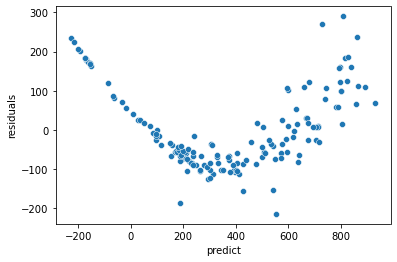

In [189]:
sns.scatterplot(x='predict',y='residuals',data=df)

In [190]:
predictedweights = df.Weight-df.predict
(predictedweights > 100).value_counts()

False    123
True      32
dtype: int64

In [191]:
predictedweights

0     -102.828042
1     -106.537553
2      -86.824211
3      -77.251710
4      -69.478344
          ...    
154    164.179606
155    169.994930
156    168.409795
157     82.520433
158     85.721561
Length: 155, dtype: float64